# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
import numpy as np# importar librerías
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_csv('C:/Users/dell/Downloads/instacart_orders.csv', sep = ';')# leer conjuntos de datos en los DataFrames
products = pd.read_csv('C:/Users/dell/Downloads/products.csv', sep = ';')
aisles = pd.read_csv('C:/Users/dell/Downloads/aisles.csv', sep = ';')
departments = pd.read_csv('C:/Users/dell/Downloads/departments.csv', sep = ';')
order_products = pd.read_csv('C:/Users/dell/Downloads/order_products.csv', sep = ';')

In [3]:
print(orders.head())
print(products.head())
print(aisles.head())
print(departments.head())
print(order_products.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                    

In [4]:
#imprimir info
orders.info()
orders.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [5]:
products.info()
products.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [6]:
aisles.info()
aisles.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Index(['aisle_id', 'aisle'], dtype='object')

In [7]:
departments.info()
departments.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Index(['department_id', 'department'], dtype='object')

In [8]:
order_products.info()
order_products.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

 - Se observa que todos los Dataframes, tienen cantidades diferentes de filas y columnas, derivado de la informacion que almacena cada uno
 - Se observa que en todos hay presencia de valores nulos
 - Los valores de ID, corresponden al formato entero
 - Existen algunos datos como los dias transcurridos desde que el cliente hizo su pedido anterior que se encuentran en formato float, seria conveniente cambiarlos a enteros, para tener mayor uniformidad en estos datos y sea mas facil manipularlos

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

 - Revisar los valores que sea necesario cambiar a formato entero
 - Conocer los valores ausentes, aplicando isna().sum(), por dF para conocer el numero de valores asuentes, o incluso value_counts() para tener mayor nocion de la cantidad de valores unicos

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
orders.duplicated().value_counts()

False    478952
True         15
Name: count, dtype: int64

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Son muy pocos los pedidos que presentan duplicados, puede ser por los dias en que se solicitan los pedidos y los horarios o quiza haya pedidos duplicados por error que posteriormente fueron cancelados y no se ven reflejados en el listado

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#order_dow: 0 = Domingo, 1 = Lunes, 2 = Martes, 3 = Miercoles, 4 = Jueves, 5 = Viernes, 6 = Sabado
#pedidos_miercoles_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
pedidos_2am_miercoles = orders.query('order_dow == 3 and order_hour_of_day == 2')
print(pedidos_2am_miercoles.head().value_counts())

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
382357    120200   19            3          2                  11.0                      1
553049    58599    13            3          2                  7.0                       1
690242    77357    2             3          2                  9.0                       1
2190225   138285   18            3          2                  11.0                      1
2766110   162084   41            3          2                  16.0                      1
Name: count, dtype: int64


¿Qué sugiere este resultado?
R: Existen varios registros el mismo dia en el mismo horario, cada detrminado numero de dias transcurridos desde la ultima ocasion que se realizo un pedido

In [232]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates() #Recuerda guardar el resultado en una variable para que se guarden los cambios
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [12]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().value_counts()

False    478952
True         15
Name: count, dtype: int64

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders.duplicated(['order_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().value_counts()

False    49694
Name: count, dtype: int64

In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
products.duplicated(['department_id']).value_counts()

True     49673
False       21
Name: count, dtype: int64

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'])
products.duplicated(['product_name']).value_counts()

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


False    48333
True      1361
Name: count, dtype: int64

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
# Se aplica isna() para conocer los valores na que pueda haber y se hace uso de la tilde para que muestre lo contrario, los no faltantes
products_sin_na = products[~products['product_name'].isna()]
products_sin_na.duplicated().value_counts()

False    48436
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().value_counts()

False    21
Name: count, dtype: int64

In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
departments.duplicated(['department_id']).value_counts()

False    21
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

R: No se visualizaron datos duplicados en el DataFrame de departments, se utilizo conteo de valores para conocer especificamente si hubiese valores duplicados, en este caso en ninguno de los dos incisos se muestran como tal, incluso se

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().value_counts()

False    134
Name: count, dtype: int64

In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles.duplicated(['aisle_id']).value_counts()

False    134
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

R: No se han encontrado ids duplicados en el dataframe, se muestra el resultado con value_counts, indicando ausencia de duplicados, al parecer este df esta limpio en ese sentido

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().value_counts()

False    4545007
Name: count, dtype: int64

In [23]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

R: Se dispuso a conocer si hay duplicados en el DF, sin embargo, no arroja ninguno, incluso se uso subset para verificar columna por columna, pero no se logro detectar ningun duplicado 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].value_counts(dropna=False)

product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64

Describe brevemente cuáles son tus hallazgos.

R: existen 1258 valores ausentes en este DF

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_na = products[products['product_name'].isna()]# imprime el df para visualizar el listado en las columnas con sus respectivos nulos
productos_na.head()

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


In [233]:
if (productos_na ['aisle_id']== 100).all(): # all se utiliza para verificar si todos los valores son True, derivados de la condicion == 100
    print('En efecto, los valores ausentes estan relacionados con ID 100')

En efecto, los valores ausentes estan relacionados con ID 100


Describe brevemente cuáles son tus hallazgos.

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
if (productos_na ['department_id']== 21).all():
    print('En efecto, los valores ausentes estan relacionados con ID 21')
else:
    print('No es asi')

En efecto, los valores ausentes estan relacionados con ID 21


Describe brevemente cuáles son tus hallazgos.

Existe una relacion entre los productos que tienen valores ausentes, referente a los nombres de los productos, todos ellos pertenecen al mismo pasillo y departamento, esto puede deberse a varios factores, como un error al ingresar los nombres de los productos en sistema

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

ambas_tablas = products[(products['aisle_id']==100) & (products['department_id']==21)]

depto_21 = departments[(departments['department_id']==21)]

pasillo_100=aisles[(aisles['aisle_id']==100)]

#print(ambas_tablas)
print(depto_21)
print(pasillo_100)
#print()
#depto_21.info()
#print()
#pasillo_100.info

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


In [30]:
print(depto_21['department'])

20    missing
Name: department, dtype: object


In [31]:
print(pasillo_100['aisle'])

99    missing
Name: aisle, dtype: object


Describe brevemente cuáles son tus hallazgos.

In [236]:
# Completa los nombres de productos ausentes con 'Unknown' 
products['product_name'].fillna('Unknown', inplace=True)
#products.fillna('Unknown')
#al remover los valores ausentes, es importante guardar los cambios en la misma variable, esto tambien se puede lograr al usar inplace=True
products

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [238]:
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al rellenar los valores ausentes, y guardar los valores en la misma variable, se observa que al verificar la presencia de ausentes, estan en 0

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [34]:
orders[orders['days_since_prior_order'].isna()] #indexacion logica booleana

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente? el simbolo & funciona para varias condiciones
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number']!=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontro que en el DF orders, los valores ausentes se encuentran en la columna de los dias despues del primer pedido

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min = order_products['add_to_cart_order'].min()
max = order_products['add_to_cart_order'].max()

print(min)
print(max)

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

-La unica columna que presenta valores ausentes es la de add to car order, con un total de 836
-el maximo y el minimo representan la cantidad de veces que se anadieron productos al carrito desde 1 hasta 64

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order' 
#Se indexa sobre el df order products para conocer los valores ausentes en la columna add to carter con respecto a la columna order id
pedidos_con_na = order_products[order_products['add_to_cart_order'].isna()]['order_id'].value_counts(dropna=False)
pedidos_con_na

order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
2621907     1
2729254     1
9310        1
2170451     1
Name: count, Length: 70, dtype: int64

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
pedidos_con_na = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
conteo_productos = order_products.groupby('order_id').size()

todos_mas_de_64 = True
for pedido_id in pedidos_con_na:
    if conteo_productos[pedido_id] <= 64:
        todos_mas_de_64 = False
        break

# Imprime el resultado
if todos_mas_de_64:
    print('Todos los pedidos con valores ausentes tienen más de 64 productos.')
else:
    print('No todos los pedidos con valores ausentes tienen más de 64 productos.')

Todos los pedidos con valores ausentes tienen más de 64 productos.


In [40]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_productos_min = orders['order_id'].min()
conteo_productos_min

4

Describe brevemente cuáles son tus hallazgos.

In [41]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999).astype(int)

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int32

In [42]:
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En general, es complicado, supongo al principio, ya que se pierde un poco el objetivo del ejercicio, debido a que se utilizan varios DataFrames, y es complicado reconocer y recordar los nombres a los cuales se esta haciendo referencia para saber que contienen y con base en ello, llamarlos para lograr filtrar los valores requeridos

Es importante, conocer bien los valores con que se cuente, ya que puede ser muy facil perderse entre la informacion, ademas es importante tener en cuenta toda la informacion clara y precisa para lograr aplicar los filtros necesarios e identificar que se debe hacer y en que momento para evitar fallas en el resultado

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [43]:
horas_invalidas = orders[(orders['order_hour_of_day'] < 0) & (orders['order_hour_of_day'] > 23)]
horas_invalidas

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [44]:
dias_invalidos = orders[(orders['order_dow'] < 0) & (orders['order_dow']>6)]
dias_invalidos

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


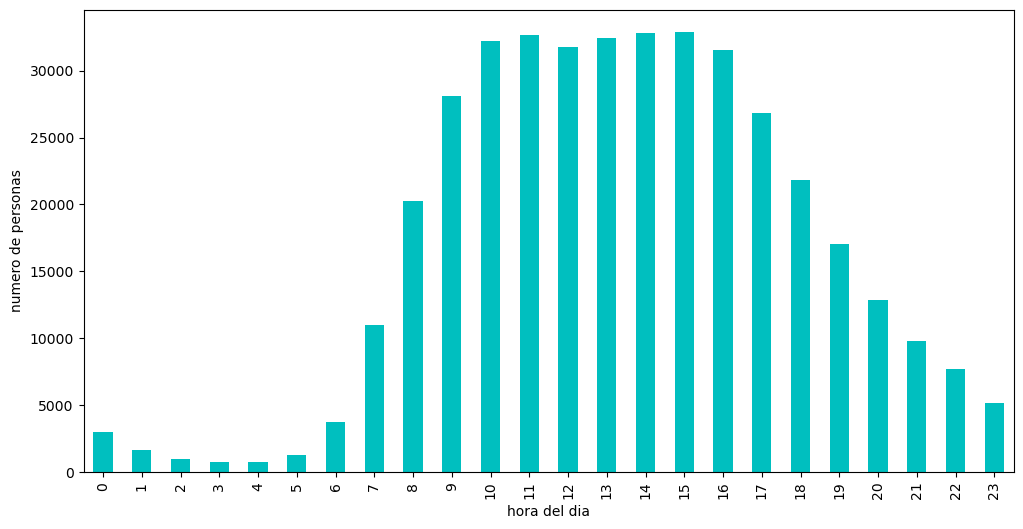

In [45]:
#Grafico que muestre numero de personas que hacen pedidos dependiendo hora del dia
#orders = pd.read_csv('C:/Users/dell/Downloads/instacart_orders.csv', sep = ';')
pedidos_por_hora = orders.groupby('order_hour_of_day')['user_id'].nunique() #agrupamos el numero de usuarios por hora, y nos indica los valores unicos x hora
pedidos_por_hora.plot(y='user_id', 
                      x='order_hour_of_day',
                     kind = 'bar',
                     ylabel = 'numero de personas',
                     xlabel = 'hora del dia',
                     figsize = (12,6),
                     color = 'c')

plt.show()

Escribe aquí tus conclusiones

El grafico que mejor se adapta para conocer la dinamica que hay entre los horarios respecto a la cantidad de clientes es el de barras, ya que muestra claramente la acumulacion y tendencia de los datos solicitados

Se observa que hay una mayor acumulacion de pedidos entre las 10 am y las 3pm, a partir de las 4 pm comienza a descender el numero de pedidos

La concentracion en estos horarios puede ser debido al tiempo en que los clientes encuentran mejor oportunidad de realizar los pedidos, ya sea para el alumerzo y/o la comida

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [46]:
pedidos_por_hora = orders.groupby('order_hour_of_day')['user_id'].nunique()
pedidos_por_hora

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64

Escribe aquí tus conclusiones

Se observa que la hora a la que se tienen mayor cantidad de registros es a las 15 hrs, con 32894, se puede pensar que es la hora de la comida

### [A3] ¿Qué día de la semana compran víveres las personas?

In [47]:
pedidos_dia = orders.groupby('order_dow')['user_id'].nunique()
pedidos_dia

order_dow
0    57661
1    56479
2    48587
3    45331
4    44281
5    46127
6    45604
Name: user_id, dtype: int64

In [48]:
dias_semana = pd.Series([0,1,2,3,4,5,6], 
                        index = ['Domingo',
                                 'Lunes', 
                                 'Martes', 
                                 'Miercoles', 
                                 'Jueves', 
                                 'Viernes', 
                                 'Sabado'])
dias_semana

Domingo      0
Lunes        1
Martes       2
Miercoles    3
Jueves       4
Viernes      5
Sabado       6
dtype: int64

Escribe aquí tus conclusiones

El dia que mayor consumo de viveres se tiene registrado es el dia domingo

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [49]:
tiempo_pedido_nuevo = orders['days_since_prior_order'].describe()
tiempo_pedido_nuevo

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

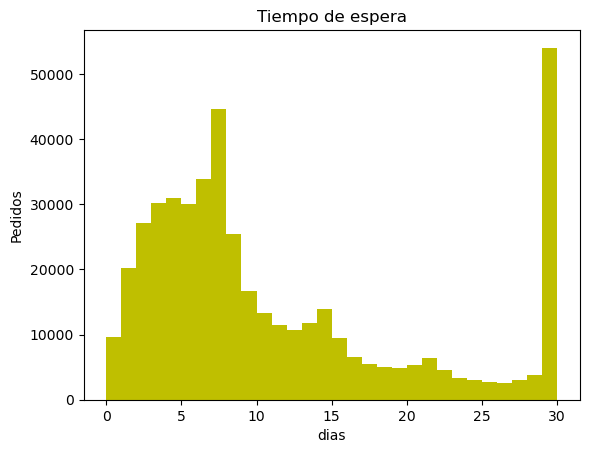

In [50]:
orders['days_since_prior_order'].plot(kind = 'hist', 
                                      bins=30, 
                                      title = 'Tiempo de espera', 
                                      xlabel = 'dias',
                                     ylabel = 'Pedidos',
                                     color = 'y')

plt.show()

Escribe aquí tus conclusiones

**Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente*

La distribucion es muy variada, el minimo como tal es de 0 dias, esto es que diario se realizan pedidos, la media se encuentra en los 11 dias, y el maximo es de hasta 30 dias, que en este caso, parece ser que la mayor cantidad de pedidos son solicitados hasta transcurrido este tiempo, tal vez la periodicidad tenga que ver con la disponibilidad de recurso para realizar este tipo de compras o simplemente se ajusta a las fechas de fin de mes que puede estar acompanado de las ofertas que presente el comercio

In [51]:
orders.groupby('days_since_prior_order')['user_id'].value_counts().sort_values(ascending=False)

days_since_prior_order  user_id
0.0                     100787     14
1.0                     176951     14
0.0                     46408      13
2.0                     194017     13
1.0                     183981     12
                                   ..
7.0                     77264       1
                        77258       1
                        77256       1
                        77230       1
30.0                    206209      1
Name: count, Length: 369881, dtype: int64

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [71]:
orders_miercoles_sabados = orders.groupby('order_dow').count()# se hace un conteo con la columna agrupada de dias de pedidos de la semana ('order_dow')
orders_miercoles_sabados

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order
order_dow,,,,,
0,84090,84090,84090,84090,78749
1,82185,82185,82185,82185,77269
2,65833,65833,65833,65833,61925
3,60912,60912,60912,60912,57284
4,59810,59810,59810,59810,56395
5,63488,63488,63488,63488,59907
6,62649,62649,62649,62649,58619


In [72]:
#Filtramos con query los dias 3 = miercoles y 6 = sabado y se resetea el indice para que solo queden los dias que nos interesan
orders_miercoles_sabados = orders_miercoles_sabados.query('order_dow == 3 or order_dow == 6').reset_index('order_dow')
orders_miercoles_sabados

,order_dow,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order
0,3,60912,60912,60912,60912,57284
1,6,62649,62649,62649,62649,58619


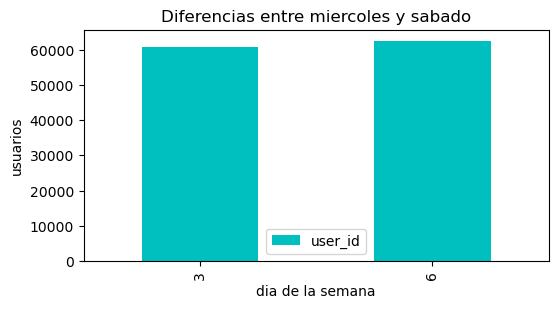

In [73]:
#Se grafican estos dias, con sus respectivas cantidades
orders_miercoles_sabados.plot(y='user_id',
                              x='order_dow',
                              title = 'Diferencias entre miercoles y sabado',
                              kind = 'bar',
                              ylabel = 'usuarios',
                              xlabel = 'dia de la semana',
                              figsize = (6,3),
                              color = 'c')
plt.show()

Escribe aquí tus conclusiones

La diferencia de pedidos entre el miercoles el sabado es muy poca (1737 pedidos) como tal no es significativa, dado el numero total de valores del DF

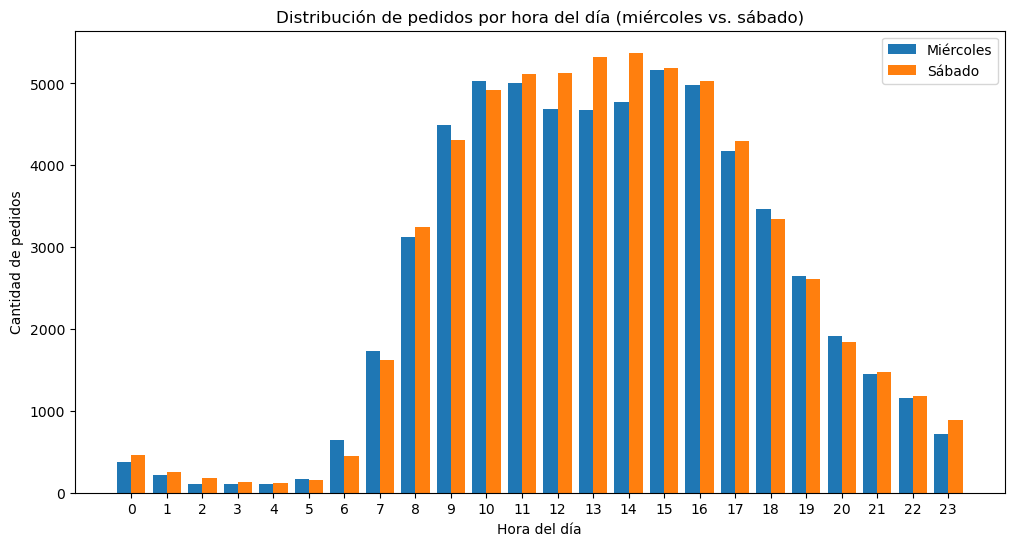

In [240]:
#Esta grafica representa mejor la comparativa entre ambos dias por hora
orders_wednesday = orders[orders['order_dow'] == 3]
orders_saturday = orders[orders['order_dow'] == 6]

wednesday_counts = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
saturday_counts = orders_saturday['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label='Miércoles')
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label='Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de pedidos por hora del día (miércoles vs. sábado)')
plt.xticks(range(24))
plt.legend()
plt.show()

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [74]:
#Agrupamos por usuario, se obtiene el conteo de los mismos, se resetea el indice y se ordena con base en la columna order_id de forma descendente
distribucion_pedidos_cliente = (orders.groupby('user_id').count().reset_index('user_id')).sort_values('order_id', ascending=False)
distribucion_pedidos_cliente

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
114085,149605,28,28,28,28,28
147428,193164,26,26,26,26,26
59737,78375,25,25,25,25,25
50752,66664,24,24,24,24,24
112979,148162,24,24,24,24,24
...,...,...,...,...,...,...
92852,121642,1,1,1,1,1
43142,56614,1,1,1,1,1
43140,56611,1,1,1,1,0
43139,56608,1,1,1,1,1


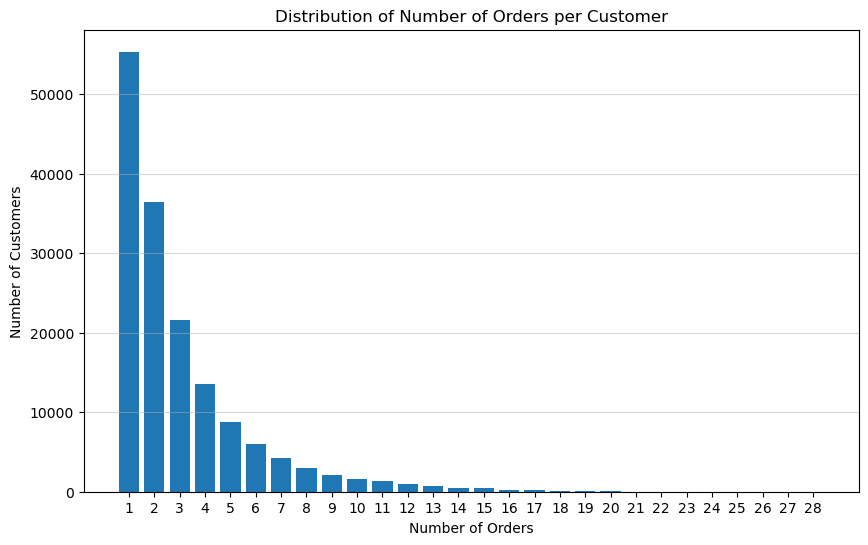

In [242]:
#un mejor analisis es el de hacer un conteo por usuarios y después revisar cuantos usuarios han hecho una cierta cantidad de compras
order_counts = orders['user_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(order_counts, bins=range(1, order_counts.max() + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')
plt.xticks(range(1, order_counts.max() + 1))
plt.grid(axis='y', alpha=0.5)
plt.show()

Escribe aquí tus conclusiones

La mayor cantidad de pedidos, corresponde a 28, al usuario 149605, en realidad es muy variable la cantidad de pedidos, mismos que se pueden ecnontrar en cualquier nivel y lugar del listado

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [126]:
#Concatenar por columnas para que aparezcan ambos DF y poder hacer el 
productos_principales = products.merge(order_products, on='product_id', how='left')
productos_principales.groupby('product_name')['order_id'].count().sort_values(ascending=False).head(20)

product_name
BANANA                      66050
BAG OF ORGANIC BANANAS      53297
ORGANIC STRAWBERRIES        37039
ORGANIC BABY SPINACH        33971
ORGANIC HASS AVOCADO        29773
ORGANIC AVOCADO             24689
LARGE LEMON                 21495
STRAWBERRIES                20018
LIMES                       19690
ORGANIC WHOLE MILK          19600
ORGANIC RASPBERRIES         19197
ORGANIC YELLOW ONION        15898
ORGANIC GARLIC              15292
ORGANIC ZUCCHINI            14584
ORGANIC BLUEBERRIES         13879
CUCUMBER KIRBY              13675
ORGANIC FUJI APPLE          12544
ORGANIC LEMON               12232
APPLE HONEYCRISP ORGANIC    11993
ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

Se obseva que los 20 productos mas populares con base en la cantidad de pedidos empiezan con banana con 66050 pedidos y el numero 20 son los tomates uva organicos con 11781

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [131]:
# Combinar orders con order_products para obtener los productos en cada pedido y el usuario que hizo el pedido
orders_por_usuario = pd.merge(orders, order_products, on='order_id', how='left')

# Opcional: Si necesitas el nombre del producto, combina también con products
pedidos_con_usuario = pd.merge(orders_por_usuario, products, on='product_id', how='left')

articulos_comprados_por_persona = pedidos_con_usuario.groupby('user_id')['product_id'].nunique().sort_values(ascending=False)

# Si solo tienes 'pedidos_con_usuario_productos' (sin el nombre del producto), también puedes usar 'product_id'
# productos_unicos_por_usuario = pedidos_con_usuario_productos.groupby('user_id')['product_id'].nunique()

print("Número de productos únicos comprados por cada usuario:")
print(articulos_comprados_por_persona)

Número de productos únicos comprados por cada usuario:
user_id
60694     252
33731     239
4694      235
151994    229
106161    228
         ... 
81463       0
197702      0
197701      0
117883      0
20652       0
Name: product_id, Length: 157437, dtype: int64


In [155]:
#Conocemos los articulos por pedido, desde el DF order products, agrupamos por order_id y filtramos por columna product_id, hacemos un conteo de cuantos
#articulos hay en cada pedido
articulos_por_pedido = order_products.groupby('order_id')['product_id'].count()
articulos_por_pedido.sort_values(ascending=False).head(20)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
102236      95
1730767     95
1800005     92
2926893     92
1386261     91
264710      91
936852      87
2721963     86
1717990     86
3125735     86
813364      85
1968313     80
1673227     78
1832957     78
293169      77
Name: product_id, dtype: int64

In [150]:
articulos_por_pedido.describe

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

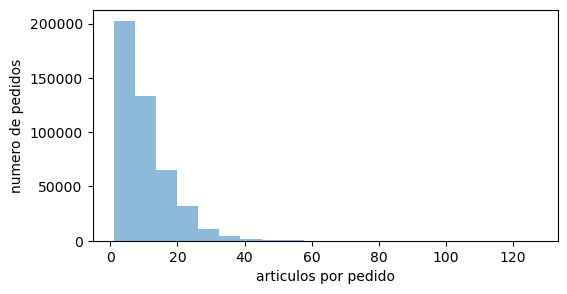

In [143]:
#Histograma
articulos_por_pedido.plot(kind = 'hist',
                         bins = 20,
                          xlabel = 'articulos por pedido',
                          ylabel='numero de pedidos',
                          figsize = (6,3),
                          alpha = 0.5
                         )
plt.show()

Escribe aquí tus conclusiones

Las cantidades que se observan van desde 1 solo articulo por pedido hasta 127, indicando que el rango es muy amplio, de acuerdo a los valores respecto a la media, es de 10 articulos por pedido, esto puede indicar que es poco comun que se tengan grandes cantidades de articulos por pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#products tabla
#order_products tabla
#reordered conocer cuantas veces se reordenan
#product_id se unen por este
#product_name y agrupar por nombre

In [181]:
principales_reordenados = order_products.merge(products, on='product_id', how='left')
reordenados = principales_reordenados[principales_reordenados['reordered'] == 1]
top_20_reordenados = reordenados['product_name'].value_counts().head(20)
print(top_20_reordenados)

product_name
BANANA                      55763
BAG OF ORGANIC BANANAS      44450
ORGANIC STRAWBERRIES        28639
ORGANIC BABY SPINACH        26233
ORGANIC HASS AVOCADO        23629
ORGANIC AVOCADO             18743
ORGANIC WHOLE MILK          16251
LARGE LEMON                 15044
ORGANIC RASPBERRIES         14748
STRAWBERRIES                13945
LIMES                       13327
ORGANIC YELLOW ONION        11145
ORGANIC GARLIC              10411
ORGANIC ZUCCHINI            10076
CUCUMBER KIRBY               9538
ORGANIC FUJI APPLE           8989
APPLE HONEYCRISP ORGANIC     8836
ORGANIC BLUEBERRIES          8799
ORGANIC LEMON                8412
ORGANIC HALF & HALF          8389
Name: count, dtype: int64


In [186]:
principales_reordenados = order_products.merge(products, on='product_id', how='left')
reordenados = principales_reordenados[principales_reordenados['reordered'] == 1]
frecuencia_reordenados = reordenados.groupby('product_name').count()
frecuencia_reordenados.sort_values(by='product_id',ascending=False).head(20)

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
product_name,,,,,,
BANANA,55763,55763,55761,55763,55763,55763
BAG OF ORGANIC BANANAS,44450,44450,44448,44450,44450,44450
ORGANIC STRAWBERRIES,28639,28639,28637,28639,28639,28639
ORGANIC BABY SPINACH,26233,26233,26232,26233,26233,26233
ORGANIC HASS AVOCADO,23629,23629,23628,23629,23629,23629
ORGANIC AVOCADO,18743,18743,18743,18743,18743,18743
ORGANIC WHOLE MILK,16251,16251,16251,16251,16251,16251
LARGE LEMON,15044,15044,15044,15044,15044,15044
ORGANIC RASPBERRIES,14748,14748,14747,14748,14748,14748


Escribe aquí tus conclusiones

Con base en la tabla, se observa que el producto BANANA es el que cuenta con mayor catnidad de repeticiones en los pedidos, seguido de las bolsas de bananas, en adelante, se nota que son productos organicos frutas y verduras las que piden con mayor frecuencia

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [230]:
# Contar el número total de veces que cada producto se pide
total_pedidos_por_producto = order_products.groupby('product_id').size()
#total_pedidos_por_producto
# Contar el número de veces que cada producto se vuelve a pedir
reordenes_por_producto = order_products[order_products['reordered'] == 1].groupby('product_id').size()
#reordenes_por_producto
# Calcular la proporción de reórdenes para cada producto
proporcion_reorden = reordenes_por_producto / total_pedidos_por_producto
# Ordenar por la proporción de reórdenes de forma descendente
proporcion_reorden_ordenada = proporcion_reorden.sort_values(ascending=False)
proporcion_reorden_ordenada.head(20) # Muestra los productos con mayor proporción de reórdenes

product_id
12038    1.0
1809     1.0
36122    1.0
3205     1.0
41901    1.0
46398    1.0
10378    1.0
31026    1.0
46437    1.0
20787    1.0
1814     1.0
46445    1.0
29168    1.0
25777    1.0
43895    1.0
31011    1.0
6490     1.0
1806     1.0
1805     1.0
16106    1.0
dtype: float64

In [226]:
proporcion_reorden.describe()

count    36228.000000
mean         0.486458
std          0.211266
min          0.010989
25%          0.333333
50%          0.500000
75%          0.616071
max          1.000000
dtype: float64

Escribe aquí tus conclusiones

El maximo de veces que se realizan es totalmente variable y disperso, los valores se encuentran desde un 1% hasta un 100% de las veces que los productos han sido reordenados, mostrando un promedio del 48%

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [100]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
# tasa de pedidos 0 = nunca lo ha pedido , 1 = si lo ha pedido antes
# tabla principal, recomenndable siempre tomar la de la izquierda, se coloca antes de merge (izquierda)
proporcion_productos = orders.merge(order_products, on='order_id', how='left')
proporcion_productos.head(10)
#columna para agrupar clientes, y columna sobre la cual se hara el calculo que lo que se quiere conocer, en este caso, la proporcion de reordenados
proporcion_productos.groupby('user_id')['reordered'].value_counts(normalize=True).head(20)

user_id  reordered
2        0.0          0.961538
         1.0          0.038462
4        0.0          1.000000
5        1.0          0.666667
         0.0          0.333333
6        0.0          1.000000
7        1.0          0.928571
         0.0          0.071429
11       0.0          0.800000
         1.0          0.200000
12       0.0          0.750000
         1.0          0.250000
13       1.0          0.565217
         0.0          0.434783
14       0.0          0.639344
         1.0          0.360656
15       1.0          0.538462
         0.0          0.461538
16       1.0          0.531250
         0.0          0.468750
Name: proportion, dtype: float64

Escribe aquí tus conclusiones

Se observa que la cantidad de veces que han sido reordenados por los usuarios es variable, pero en el ejemplo impreso se puede observar desde un 3% hasta un 46% de reordenados, el margen es muy amplio, desde los que no vuelven a pedir hasta casi la mitad de las veces

Ahora, no podemos sacar un promedio, ya que, de hacerlo, el resultado arrojaria un resultado distorsionado debido a la amplia diferencia entre unos y otros

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [162]:
#Se agrupa por product_id
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos 
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?
principales = order_products[order_products.add_to_cart_order==1][['product_id','add_to_cart_order']].groupby('product_id').count()
#Reseteamos el indice para tener los indices ordenados despues de agruparlos
principales.reset_index(inplace=True)
#ordenamos en orden descendente por la columna add_to_cart_order
principales = principales.sort_values(by='add_to_cart_order',ascending=False).head(20)
#Se concatena por columnas con merge ambas tablas, la principal es el nuevo df principales en conjunto con products 
#y seleccionamos la columna que nos interesa, que es product_id
#print(principales.merge(products,on = 'product_id',how= 'left'))
principales = principales.merge(products,on = 'product_id',how= 'left')[['product_id','product_name','add_to_cart_order']]
#cambiamos el nombre de la columna, para saber el numero de veces de los productos que colocan las personas en su carrito
principales.rename(columns={'add_to_cart_order':'#_veces'})

,product_id,product_name,#_veces
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


Escribe aquí tus conclusiones

El producto llamado banana, es el que registra mayor cantidad de veces, lo que podria indicar que aunado con el listado de los otros 19, son los que ponen primero en su carrito, ya que son los que aparecen con mayor numero de registros

### Conclusion general del proyecto:

El procesamiento y limpieza de los datos debe ser muy claro y especifico, ya que si no se tiene conocimiento de las variables que se estan utilizando y la informacion contenida en ellas, sera complicado y podemos obtener informacion erronea en los resultados
Es importante, tener bien identificados los datos y como procesarlos
